In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
#import matplotlib.style as style
#style.use('fivethirtyeight')

In [22]:
housing = pd.read_csv('train.csv',index_col=0)

In [47]:
#housing.head()

In [46]:
#housing.columns

In [25]:
housing.shape

(1935, 81)

In [274]:
target = 'SalePrice'
#['GrLivArea']
sales_feats = ['MoSold','YrSold','SaleType']
overall_feats = ['OverallQual','OverallCond','Functional']
utilities_feats = ['Utilities','Heating','HeatingQC','CentralAir','Electrical']
kitchen_feats = ['KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
pool_feats = ['PoolArea','PoolQC']

# 1. Living Area:  
## Gr Liv Area (Continuous): Above grade (ground) living area square feet


In [212]:
#No null / missing values for Gr Liv Area and Sales Price 
data = housing[['GrLivArea',target]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1935 non-null   int64
 1   SalePrice  1935 non-null   int64
dtypes: int64(2)
memory usage: 45.4 KB


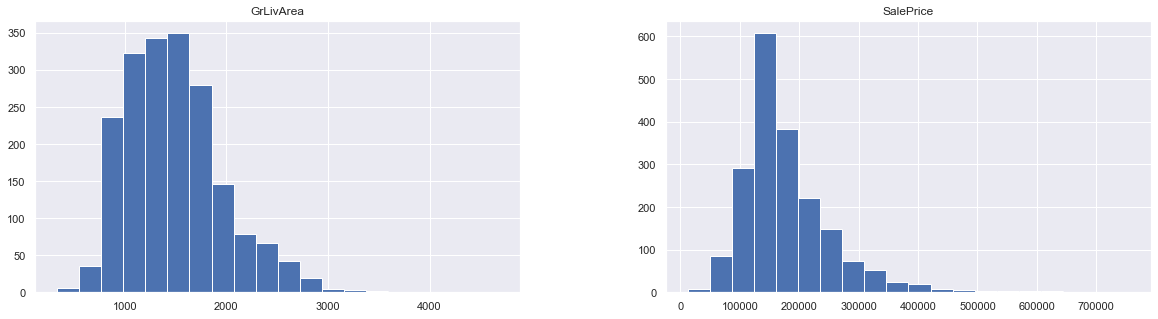

In [213]:
data.hist(bins=20,figsize=(20,5))
sns.set(rc={'figure.figsize':(8,8)})


In [214]:
data.describe()

,GrLivArea,SalePrice
count,1935.000000,1935.000000
mean,1486.813437,178494.854780
std,490.158634,75786.077025
min,334.000000,12789.000000
25%,1112.000000,129900.000000
50%,1433.000000,160000.000000
75%,1728.000000,210950.000000
max,4676.000000,755000.000000


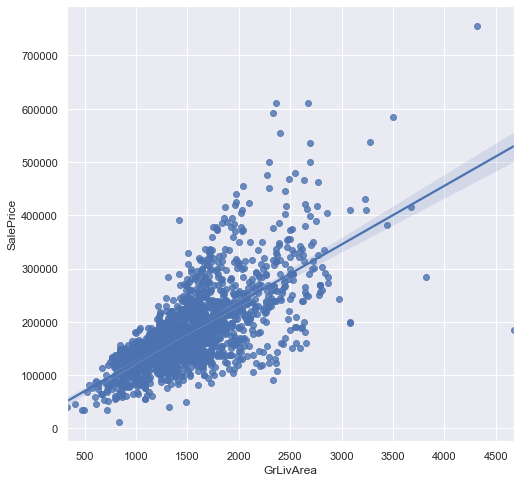

In [215]:
a = sns.regplot(x=housing['GrLivArea'],y=housing['SalePrice'])
plt.show()

### Log-Log Relationship 

array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

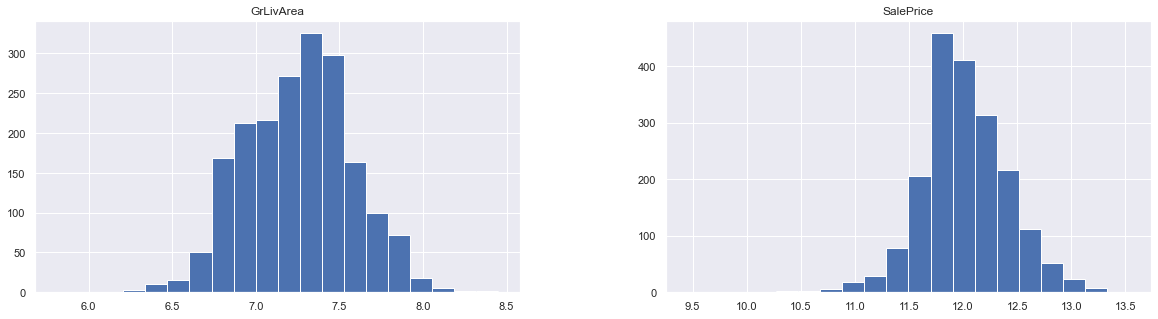

In [216]:
data = np.log(housing[['GrLivArea',target]])
data.hist(bins=20,figsize=(20,5))

In [217]:
data.describe()

,GrLivArea,SalePrice
count,1935.000000,1935.000000
mean,7.252357,12.013818
std,0.323547,0.394603
min,5.811141,9.456341
25%,7.013915,11.774520
50%,7.267525,11.982929
75%,7.454720,12.259376
max,8.450198,13.534473


Text(0.5, 0, 'Log(GrLivArea)')

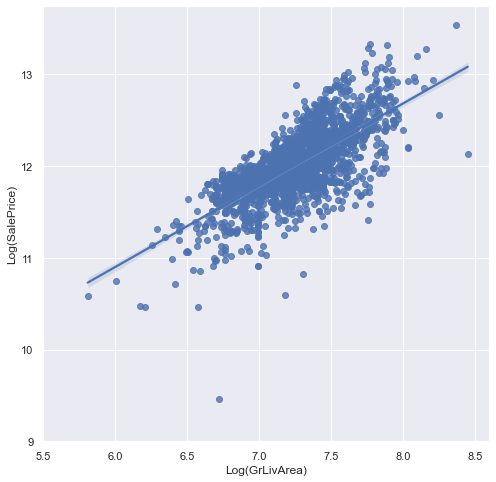

In [218]:
sns.regplot(x=np.log(housing['GrLivArea']),y=np.log(housing['SalePrice']))
plt.ylim(9,)
plt.xlim(5.5, 8.6)
plt.ylabel('Log(SalePrice)')
plt.xlabel('Log(GrLivArea)')

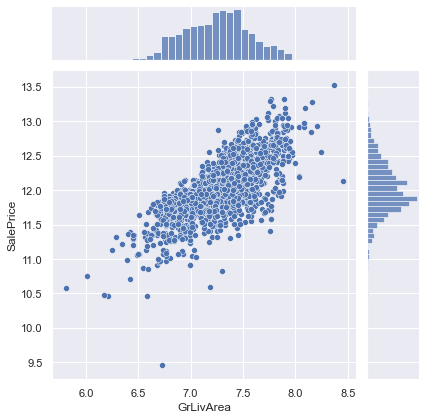

In [219]:
sns.jointplot(x=np.log(training['GrLivArea']),y=np.log(training['SalePrice']))

# 2. Sales Features:
## Mo Sold (Discrete): Month Sold (MM)
## Yr Sold (Discrete): Year Sold (YYYY)
## Sale Type (Nominal): Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [250]:
#No missing values 
#If we use these, treat MoSold and YrSold as ordinal categorical values, strings vs. numeric?
data= training[sales_feats]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MoSold    1935 non-null   int64 
 1   YrSold    1935 non-null   int64 
 2   SaleType  1935 non-null   object
dtypes: int64(2), object(1)
memory usage: 125.0+ KB


In [221]:
data.mode()

,MoSold,YrSold,SaleType
0,6,2009,WD


<AxesSubplot:xlabel='MoSold', ylabel='count'>

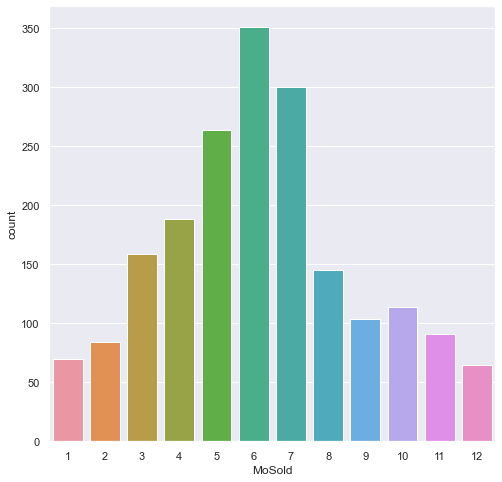

In [222]:
sns.countplot(x=training['MoSold'])


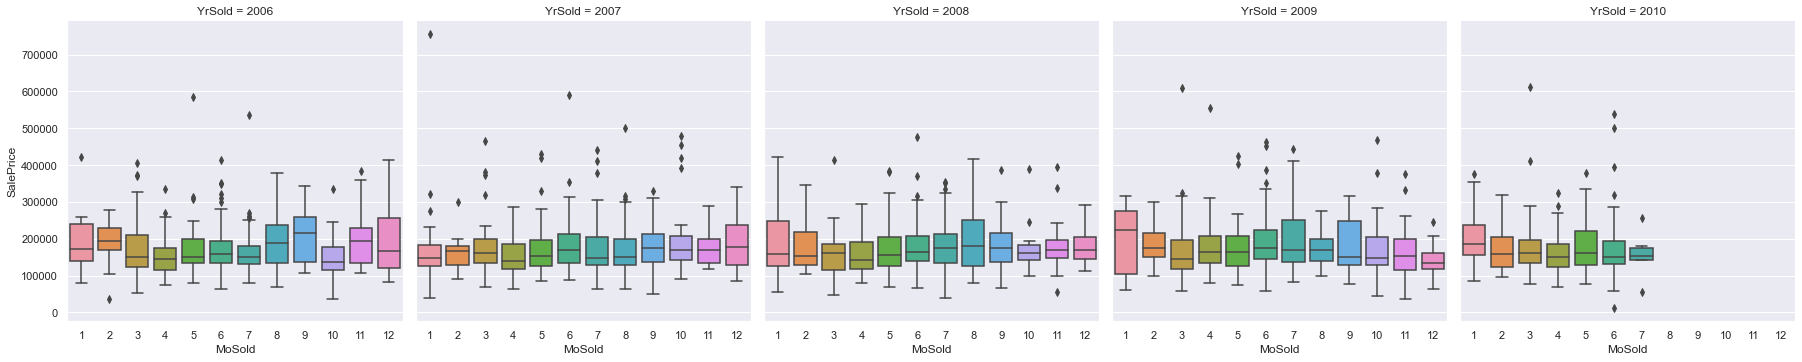

In [370]:
g = sns.catplot(x="MoSold", y="SalePrice",
                col="YrSold", data=training, kind='box')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

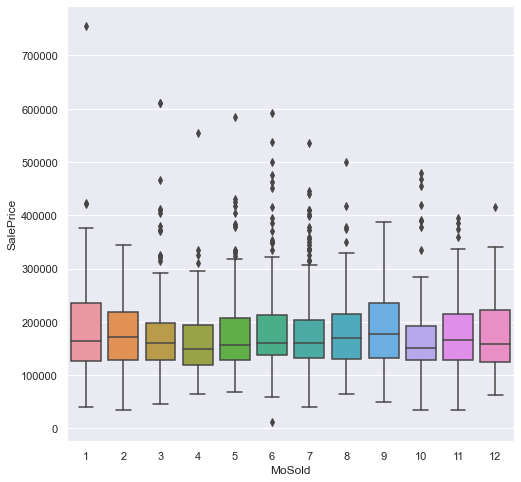

In [353]:
sns.boxplot(x=training['MoSold'],y=training['SalePrice'])

<AxesSubplot:xlabel='YrSold', ylabel='count'>

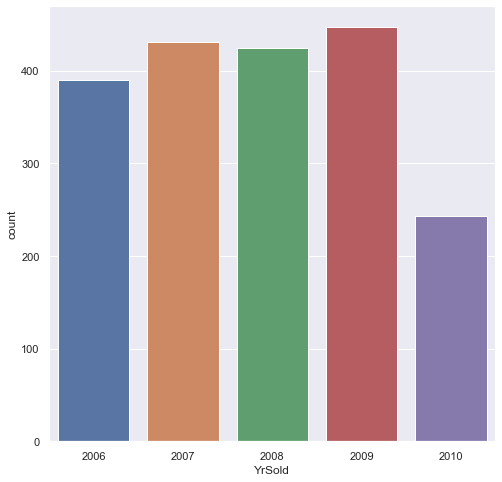

In [224]:
sns.countplot(x=training['YrSold'])

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

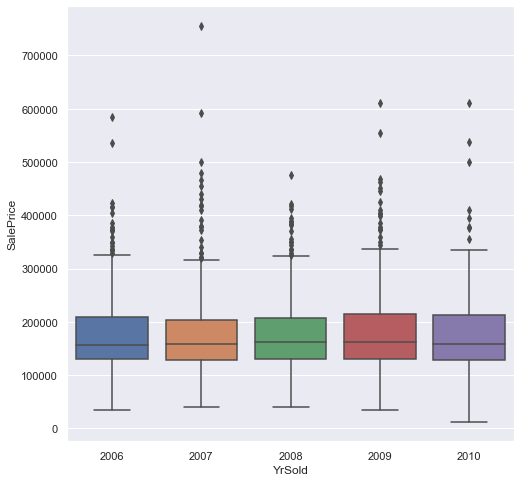

In [234]:
sns.boxplot(x=training['YrSold'],y=training['SalePrice'])

In [225]:
training['DateSold'] = pd.to_datetime(training['MoSold'].astype(str) + '/'+ (training['YrSold']).astype(str),format="%m/%Y")

<AxesSubplot:xlabel='DateSold', ylabel='SalePrice'>

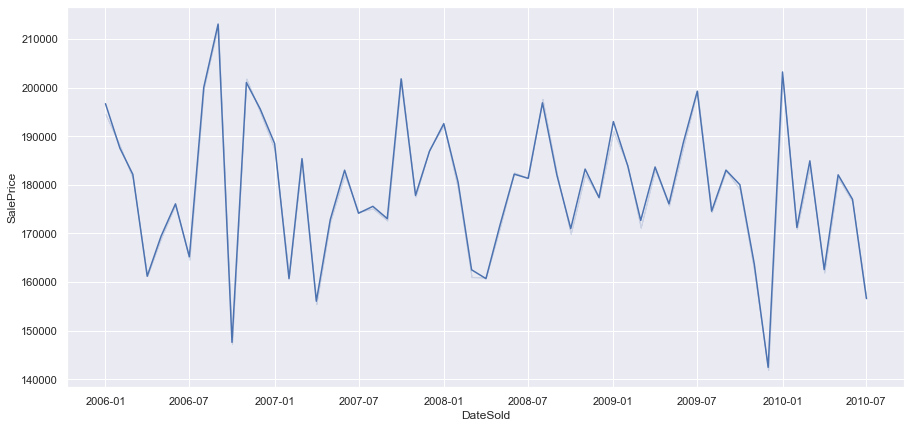

In [230]:
plt.figure(figsize=(15,7))
sns.lineplot(x=training['DateSold'],y=training['SalePrice'],ci=0)

In [227]:
a = training.groupby(['YrSold','DateSold'])['PID'].count()

<AxesSubplot:xlabel='MoSold'>

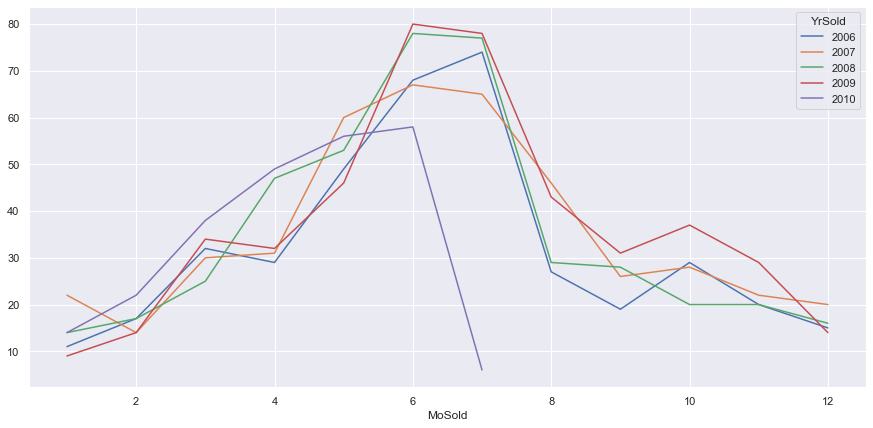

In [228]:
fig, ax = plt.subplots(figsize=(15,7))

training.groupby(['MoSold','YrSold'])['PID'].count().unstack().plot(ax=ax)

In [255]:
#Sales made in 2010 are only from the first half of the year
training[training['YrSold']==2010]['MoSold'].value_counts()

6    58
5    56
4    49
3    38
2    22
1    14
7     6
Name: MoSold, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='count'>

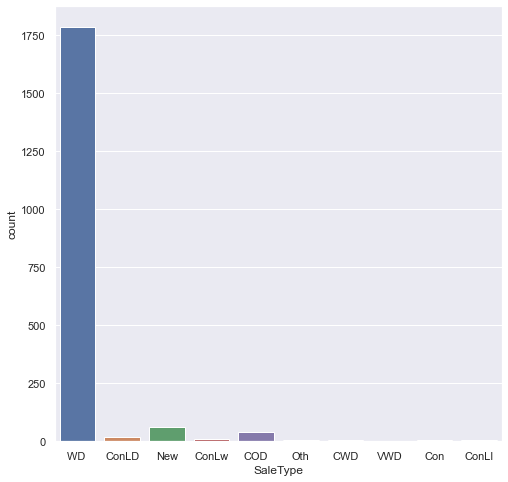

In [257]:
sns.countplot(x=training['SaleType'])

In [258]:
training['SaleType'].value_counts()

WD       1786
New        61
COD        39
ConLD      19
ConLw       8
CWD         7
ConLI       6
Oth         4
Con         4
VWD         1
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

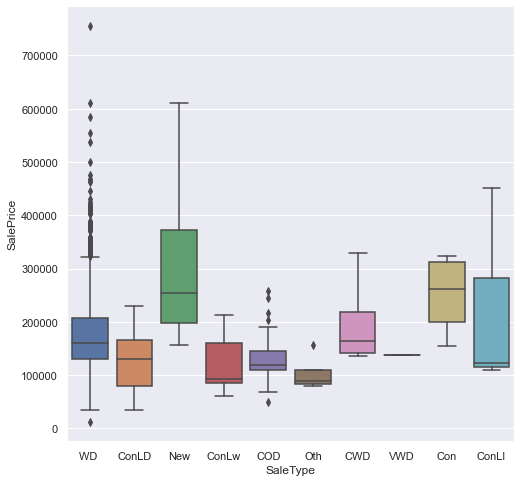

In [288]:
sns.boxplot(x=training['SaleType'],y=training['SalePrice'])

   WD     Warranty Deed - Conventional
   CWD    Warranty Deed - Cash
   VWD    Warranty Deed - VA Loan
   New    Home just constructed and sold
   COD    Court Officer Deed/Estate
   Con    Contract 15% Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth    Other

# 3. Overall Features:
## Overall Qual (Ordinal): Rates the overall material and finish of the house
## Overall Cond (Ordinal): Rates the overall condition of the house
- 10 Very Excellent
- 9 Excellent
- 8 Very Good
- 7 Good
- 6 Above Average
- 5 Average
- 4 Below Average
- 3 Fair
- 2 Poor
- 1 Very Poor
## Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)
- Typ	Typical Functionality
- Min1	Minor Deductions 1
- Min2	Minor Deductions 2
- Mod	Moderate Deductions
- Maj1	Major Deductions 1
- Maj2	Major Deductions 2
- Sev	Severely Damaged
- Sal	Salvage only


In [276]:
#No Null values 
data= training[overall_feats]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OverallQual  1935 non-null   int64 
 1   OverallCond  1935 non-null   int64 
 2   Functional   1935 non-null   object
dtypes: int64(2), object(1)
memory usage: 125.0+ KB


<AxesSubplot:xlabel='OverallQual', ylabel='count'>

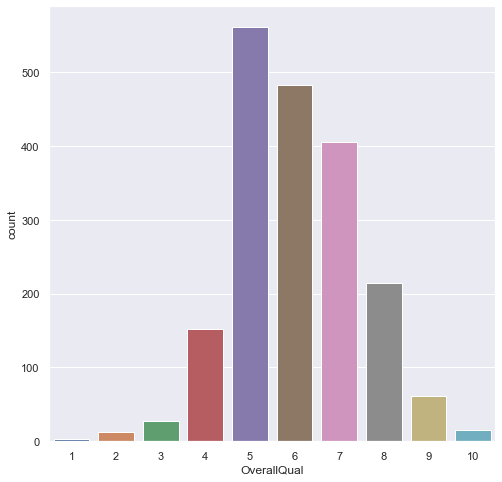

In [283]:
sns.countplot(x=training['OverallQual'])

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

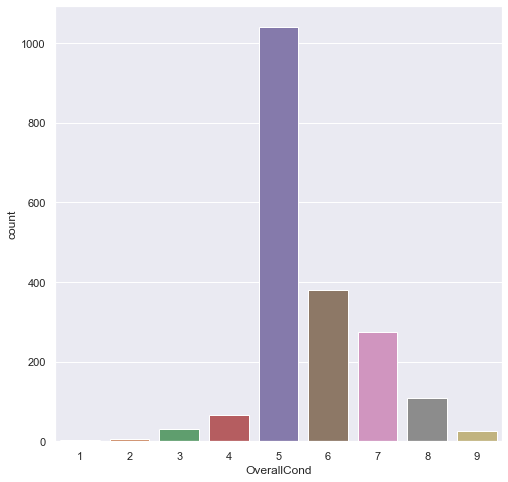

In [284]:
sns.countplot(x=training['OverallCond'])

Functional
- Typ	Typical Functionality
- Min1	Minor Deductions 1
- Min2	Minor Deductions 2
- Mod	Moderate Deductions
- Maj1	Major Deductions 1
- Maj2	Major Deductions 2
- Sev	Severely Damaged
- Sal	Salvage only

In [289]:
training['Functional'].value_counts()

Typ     1796
Min2      47
Min1      45
Mod       26
Maj1      14
Maj2       6
Sal        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

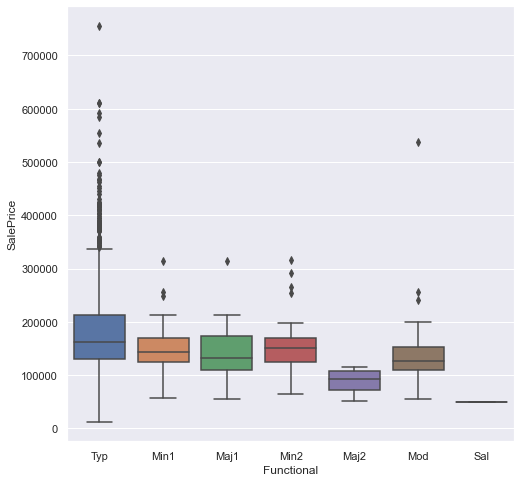

In [290]:
#Perhaps we remove the 1 Sal Salvage only data point
sns.boxplot(x=training['Functional'],y=training['SalePrice'])

# 4. Utilities Features:
## Utilities (Ordinal): Type of utilities available
- AllPub	All public Utilities (E,G,W,& S)	
- NoSewr	Electricity, Gas, and Water (Septic Tank)
- NoSeWa	Electricity and Gas Only
- ELO	Electricity only
## Heating	(Nominal): Type of heating
- Floor	Floor Furnace
- GasA	Gas forced warm air furnace
- GasW	Gas hot water or steam heat
- Grav	Gravity furnace	
- OthW	Hot water or steam heat other than gas
- Wall	Wall furnace
## HeatingQC (Ordinal): Heating quality and condition
- Ex	Excellent
- Gd	Good
- TA	Average/Typical
- Fa	Fair
- Po	Poor
## Central Air (Nominal): Central air conditioning
- N	No
- Y	Yes
## Electrical (Ordinal): Electrical system
- SBrkr	Standard Circuit Breakers & Romex
- FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
- FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix	Mixed

In [291]:
data = training[utilities_feats]

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Utilities   1935 non-null   object
 1   Heating     1935 non-null   object
 2   HeatingQC   1935 non-null   object
 3   CentralAir  1935 non-null   object
 4   Electrical  1934 non-null   object
dtypes: object(5)
memory usage: 155.2+ KB


In [298]:
# PID 916386080, index = 1858 has null value for Electrical 
training[training['Electrical'].isnull()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DateSold
1858,916386080,1394,167500,80,RL,73.0,9735,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,2008-05-01


In [300]:
for feature in utilities_feats:
    print(training[feature].value_counts())
    print(sum(training[feature].isnull()))
    print('')

AllPub    1934
NoSewr       1
Name: Utilities, dtype: int64
0

GasA     1907
GasW       17
Wall        5
Grav        4
Floor       1
OthW        1
Name: Heating, dtype: int64
0

Ex    974
TA    582
Gd    323
Fa     55
Po      1
Name: HeatingQC, dtype: int64
0

Y    1810
N     125
Name: CentralAir, dtype: int64
0

SBrkr    1775
FuseA     128
FuseF      24
FuseP       7
Name: Electrical, dtype: int64
1



<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

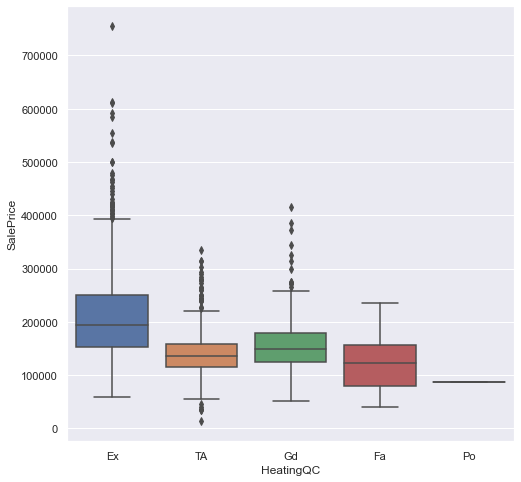

In [337]:
#Should convert to numerical encoding?
sns.boxplot(x=training['HeatingQC'],y=training['SalePrice'])

In [338]:
# Convert Quality values to integers 
#create dictionary of ordinal to integer mapping
ord_dict = {'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1}
# apply using map
training.HeatingQC.map(ord_dict)

0       5
1       3
2       5
3       5
4       5
       ..
1930    5
1931    5
1932    5
1933    3
1934    5
Name: HeatingQC, Length: 1935, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

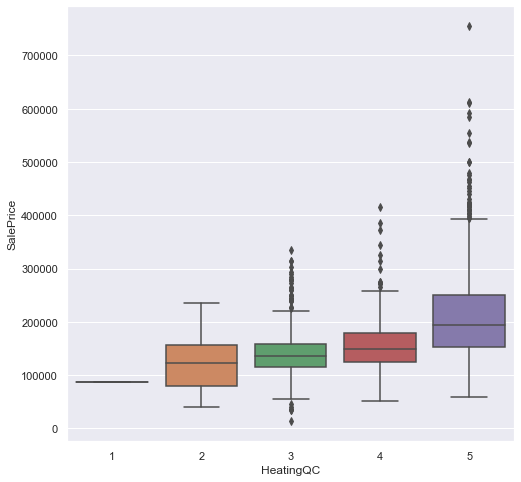

In [342]:
sns.boxplot(x=training.HeatingQC.map(ord_dict),y=training['SalePrice'])

In [304]:
#PID 910201020, id =1635
training[training['HeatingQC']=='Po']

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DateSold
1635,910201020,803,87000,45,RM,50.0,5000,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,2007-12-01


<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

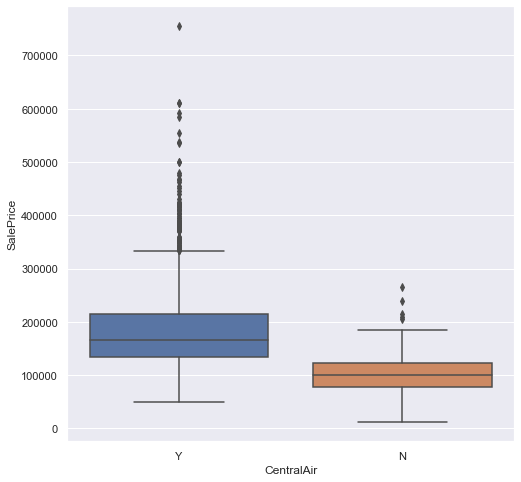

In [305]:
sns.boxplot(x=training['CentralAir'],y=training['SalePrice'])

In [316]:
training[training['CentralAir']=='N'].groupby(['Neighborhood'])['PID'].count()

Neighborhood
BrkSide    17
ClearCr     1
Crawfor     2
Edwards    23
Gilbert     1
IDOTRR     19
NAmes      10
OldTown    38
SWISU       7
Sawyer      6
SawyerW     1
Name: PID, dtype: int64

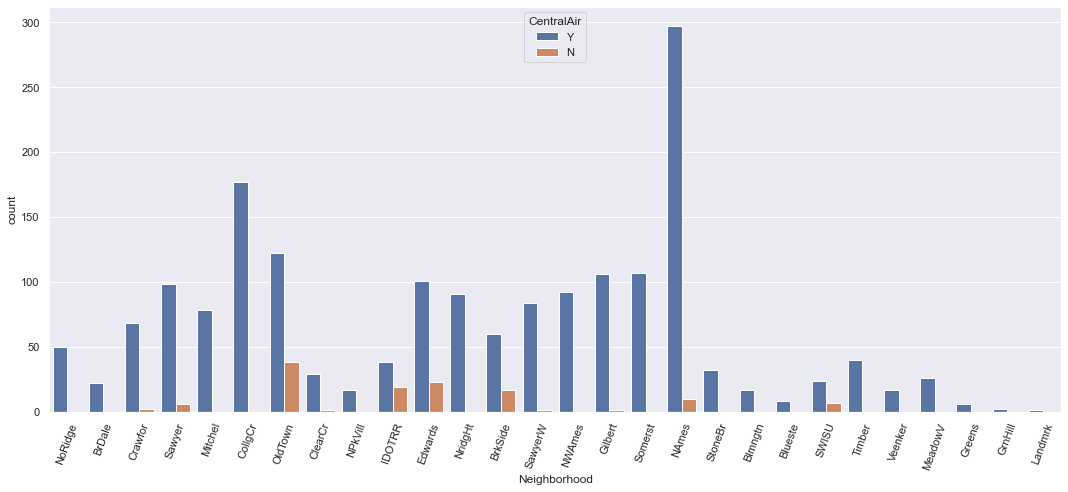

In [319]:
plt.figure(figsize=(15,7))
sns.countplot(x="Neighborhood", hue="CentralAir", data=training)
plt.xticks(rotation=70)
plt.tight_layout()

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

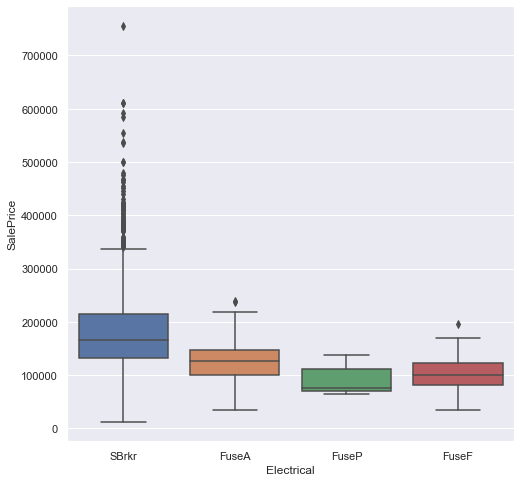

In [320]:
sns.boxplot(x=training['Electrical'],y=training['SalePrice'])

# 5. Kitchen Features:
## Kitchen (Discrete): Kitchens above grade
## KitchenQual (Ordinal): Kitchen quality
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- Po	Poor


## TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)



In [334]:
#No missing values 
data = training[kitchen_feats]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   KitchenAbvGr  1935 non-null   int64 
 1   KitchenQual   1935 non-null   object
 2   TotRmsAbvGrd  1935 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 125.0+ KB


In [322]:
data.describe()

,KitchenAbvGr,TotRmsAbvGrd
count,1935.000000,1935.000000
mean,1.043928,6.406718
std,0.209971,1.541047
min,0.000000,2.000000
25%,1.000000,5.000000
50%,1.000000,6.000000
75%,1.000000,7.000000
max,3.000000,13.000000


In [324]:
training['KitchenAbvGr'].value_counts()

1    1849
2      84
0       1
3       1
Name: KitchenAbvGr, dtype: int64

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

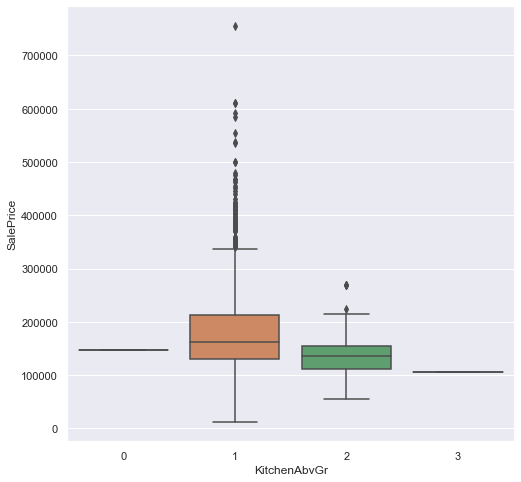

In [333]:
sns.boxplot(x=training['KitchenAbvGr'],y=training['SalePrice'])

In [330]:
#Can this be combined with totalSF or area measure ? spaciousness = GrLiVArea/NumberRooms ?
training['TotRmsAbvGrd'].value_counts().sort_index()

2       1
3      14
4     138
5     401
6     554
7     437
8     218
9      93
10     51
11     15
12     12
13      1
Name: TotRmsAbvGrd, dtype: int64

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

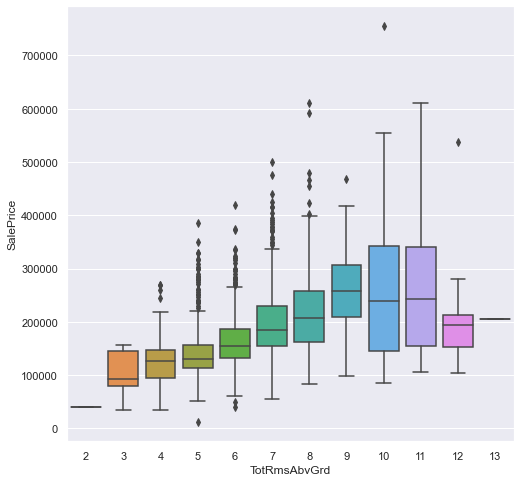

In [331]:
sns.boxplot(x=training['TotRmsAbvGrd'],y=training['SalePrice'])

In [336]:
training['KitchenQual'].value_counts()

TA    1012
Gd     768
Ex     109
Fa      45
Po       1
Name: KitchenQual, dtype: int64

In [339]:
# Convert Quality values to integers 
#create dictionary of ordinal to integer mapping
ord_dict = {'Ex':5, 
        'Gd':4, 
        'TA':3, 
        'Fa':2, 
        'Po':1}
# apply using map
training.KitchenQual.map(ord_dict)

0       4
1       3
2       4
3       4
4       4
       ..
1930    4
1931    3
1932    4
1933    3
1934    3
Name: KitchenQual, Length: 1935, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

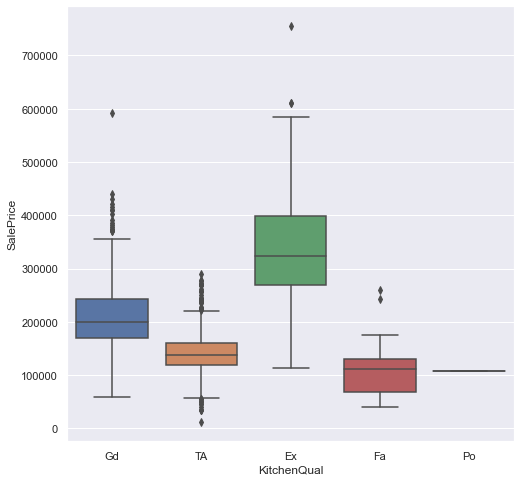

In [340]:
sns.boxplot(x=training['KitchenQual'],y=training['SalePrice'])

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

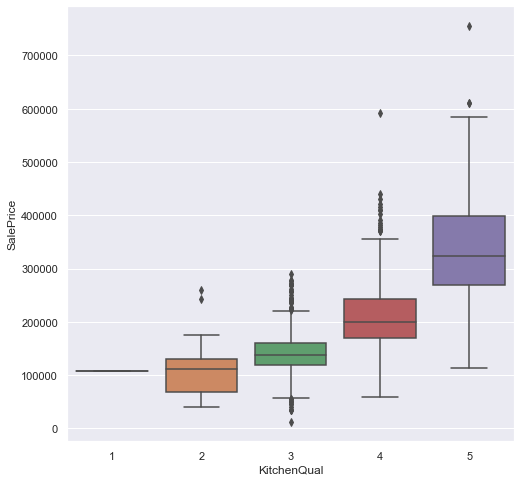

In [341]:
sns.boxplot(x=training.KitchenQual.map(ord_dict),y=training['SalePrice'])

# 6. Pool Features:
## Pool Area (Continuous): Pool area in square feet
## Pool QC (Ordinal): Pool quality
- Ex	Excellent
- Gd	Good
- TA	Typical/Average
- Fa	Fair
- NA	No Pool

In [343]:
data=training[pool_feats]

In [352]:
#Only three houses in training set have pools 
#Should we change PoolQC from NA=No Pool from ordinal to nominal flag - has pool or not ?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 1934
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PoolArea  1935 non-null   int64 
 1   PoolQC    3 non-null      object
dtypes: int64(1), object(1)
memory usage: 109.9+ KB


In [350]:
#This feature can be dropped 
training['PoolArea'].value_counts()

0      1932
519       1
561       1
576       1
Name: PoolArea, dtype: int64

In [349]:
training['PoolQC'].value_counts()

Fa    1
Gd    1
TA    1
Name: PoolQC, dtype: int64

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

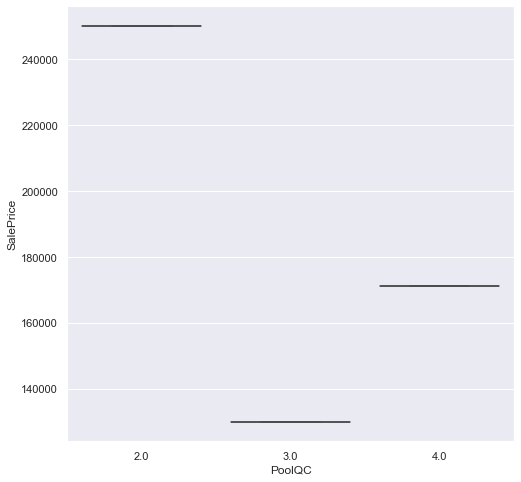

In [351]:
sns.boxplot(x=training.PoolQC.map(ord_dict),y=training['SalePrice'])